# Question 1 
Delivery_time -> Predict delivery time using sorting time 

# EDA

In [1]:
# Step 1: importing neccessary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(15,10)
# plt.rcParams['figure.dpi']=250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# load data
data = pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
# checking descriptive stats 
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
# checking for null values
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [4]:
# Step 2: check for duplicated record
data.duplicated().sum()

0

<AxesSubplot:>

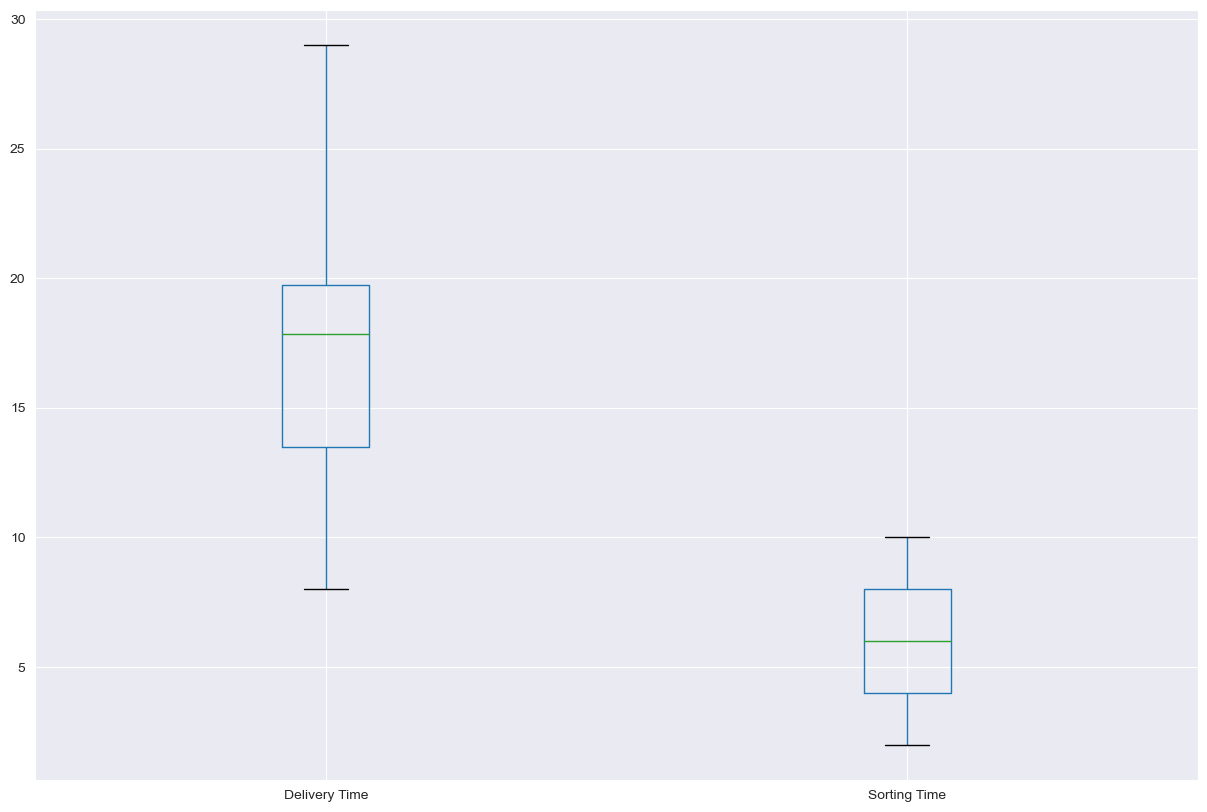

In [5]:
# step 3: check for outliers 
data.boxplot()

There is no outliers present

In [6]:
# step 4 checking for correlation 
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

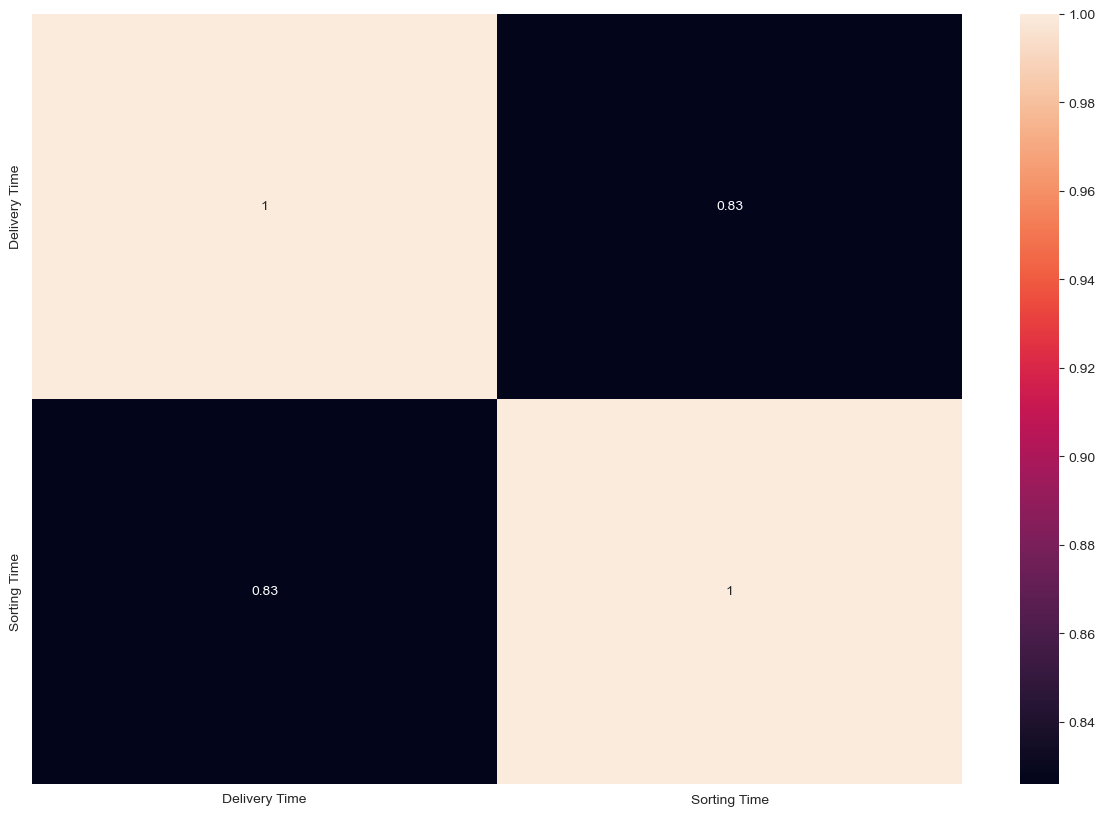

In [7]:
sns.heatmap(data.corr(),annot=True)

There is good correlation between the two variable.

The score is more than 0.8 which is a good sign.

# model building

Text(0.5, 1.0, 'Sorting')

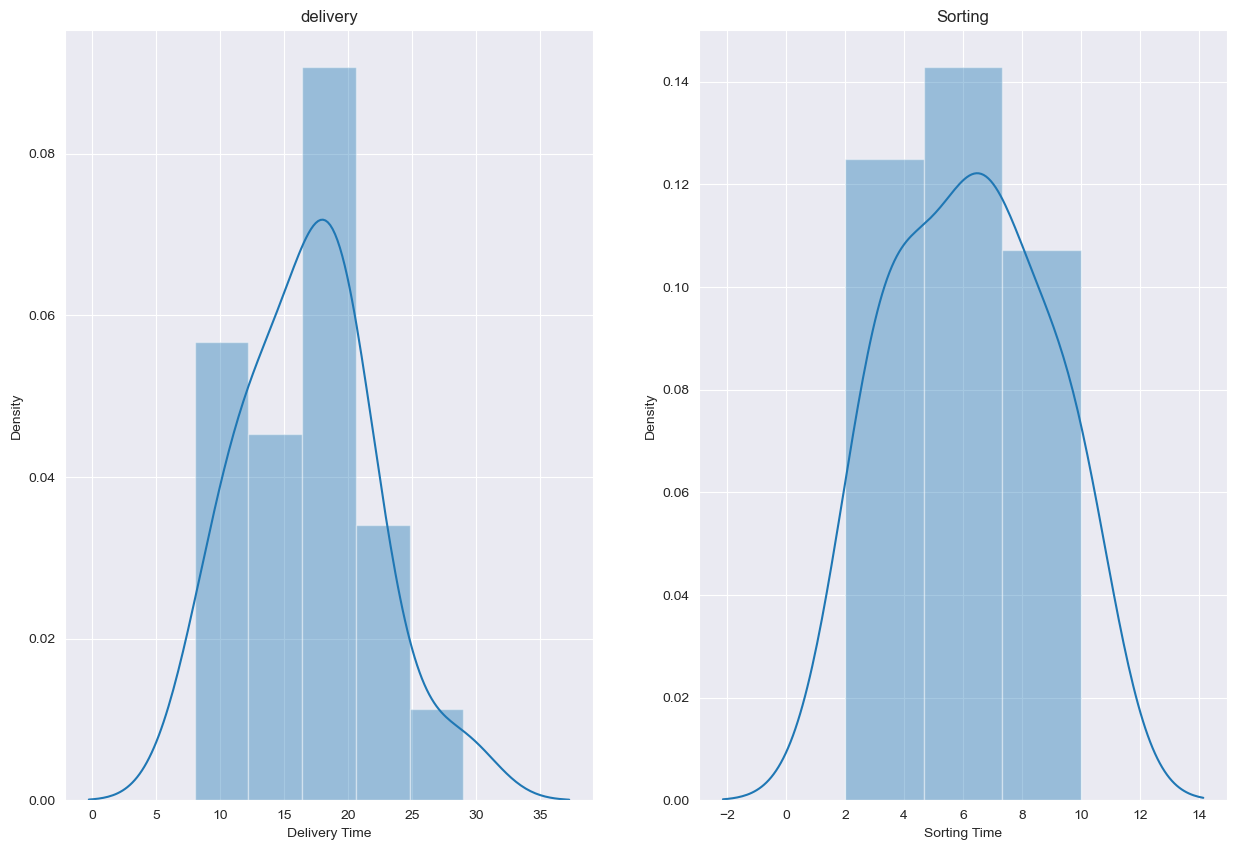

In [8]:
# check for skewness 
plt.subplot(1,2,1)
sns.distplot(data["Delivery Time"])
plt.title('delivery')

plt.subplot(1,2,2)
sns.distplot(data["Sorting Time"])
plt.title('Sorting')

In [9]:
data['Sorting Time'].skew()

0.047115474210530174

log transformation for reducing skewness

In [10]:
data['log_sorting'] = np.log(data['Sorting Time'])
data.head()

,Delivery Time,Sorting Time,log_sorting
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


Text(0.5, 1.0, 'Sorting')

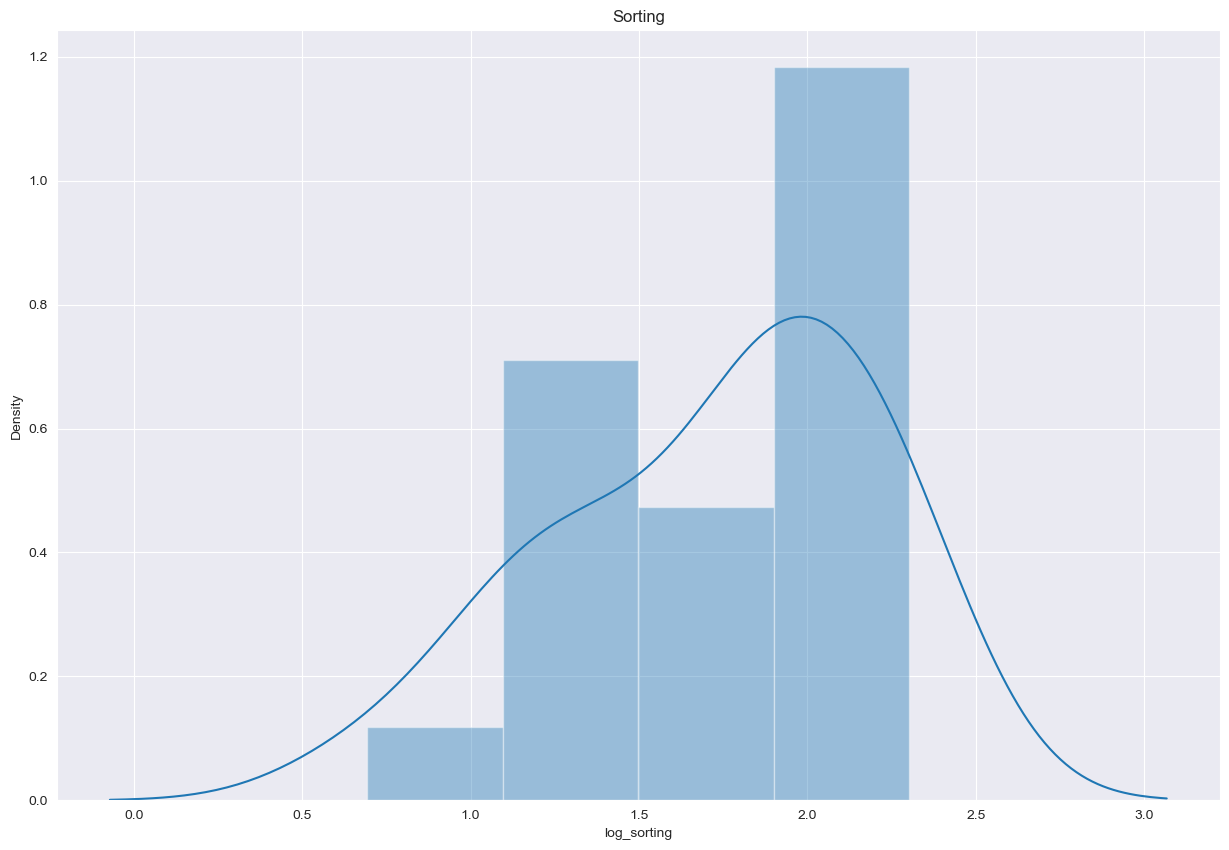

In [11]:
sns.distplot(data["log_sorting"])
plt.title('Sorting')

In [12]:
data['log_sorting'].skew()

-0.6052357185134765

square root transformation ,another way to deal with skewness 

In [13]:
data['sqrt_sorting'] = np.sqrt(data['Sorting Time'])
data.head()

,Delivery Time,Sorting Time,log_sorting,sqrt_sorting
0,21.00,10,2.302585,3.162278
1,13.50,4,1.386294,2.000000
2,19.75,6,1.791759,2.449490
3,24.00,9,2.197225,3.000000
4,29.00,10,2.302585,3.162278


In [14]:
data['sqrt_sorting'].skew()

-0.25981634723613994

Text(0.5, 1.0, 'Sorting')

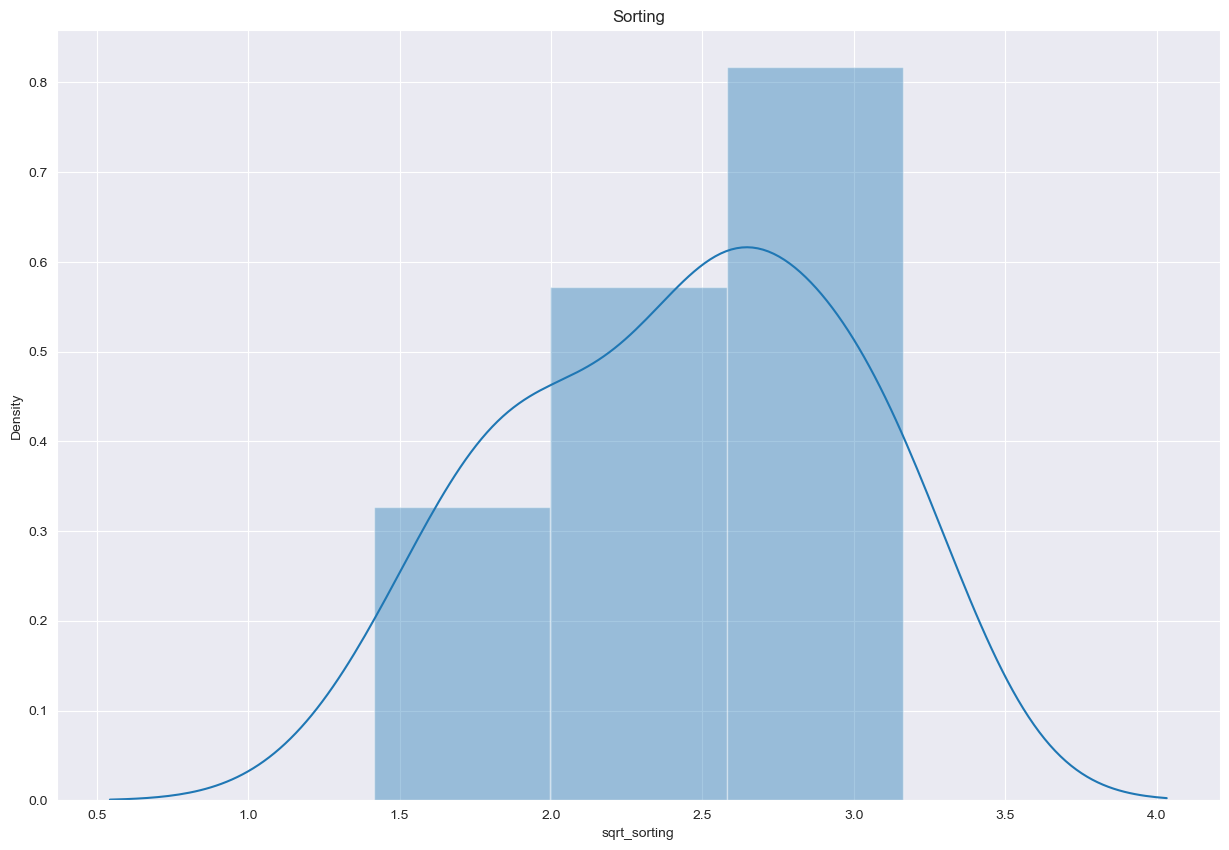

In [15]:
sns.distplot(data["sqrt_sorting"])
plt.title('Sorting')

*We will now fit linear regression model

*We will create 3 models and check for best model 

In [16]:
data.rename(columns={'Delivery Time':'delivery_time',
                  'Sorting Time':'sorting_time'},inplace=True)

In [17]:
data.head()

,delivery_time,sorting_time,log_sorting,sqrt_sorting
0,21.00,10,2.302585,3.162278
1,13.50,4,1.386294,2.000000
2,19.75,6,1.791759,2.449490
3,24.00,9,2.197225,3.000000
4,29.00,10,2.302585,3.162278


In [18]:
# importing statsmodel for linearregression model
import statsmodels.formula.api as smf

In [19]:
# model 1 with orignal data 
model_1 = smf.ols('sorting_time ~ delivery_time',data= data).fit()

In [20]:
model_1.rsquared

0.682271474841723

In [21]:
model_1.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [22]:
#model 2 with log transformation
model_2 = smf.ols('log_sorting ~ delivery_time',data= data).fit()

In [23]:
model_2.rsquared

0.6954434611324223

In [24]:
model_2.params

Intercept        0.437237
delivery_time    0.076901
dtype: float64

In [25]:
#model 3 with square-root transformation
model_3 = smf.ols('sqrt_sorting ~ delivery_time',data= data).fit()

In [26]:
model_3.rsquared

0.695806227630867

In [27]:
model_3.params

Intercept        0.960934
delivery_time    0.087671
dtype: float64

# ploting best fit line for 3 models

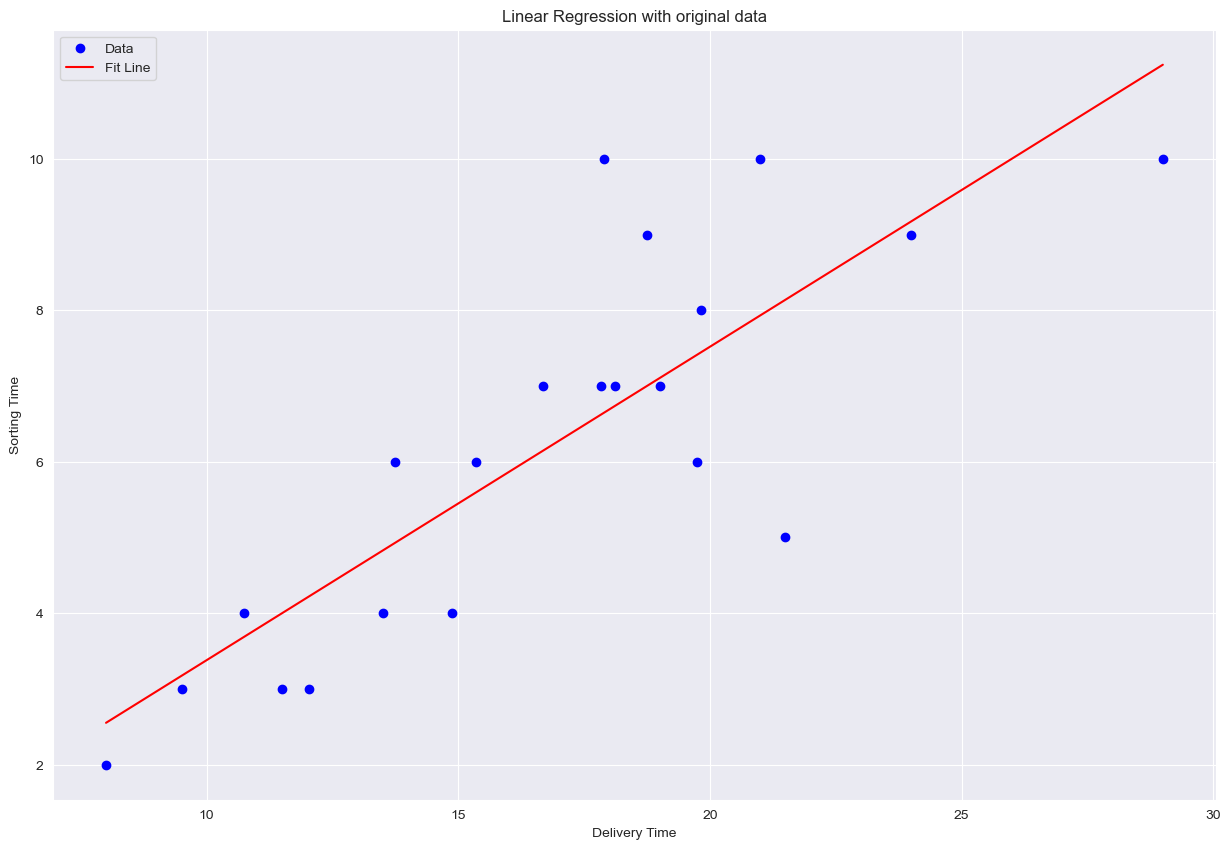

In [46]:
# Get the regression line parameters
intercept = model_1.params['Intercept']
slope = model_1.params['delivery_time']

# Generate the fit line points
x = np.linspace(data['delivery_time'].min(), data['delivery_time'].max(), 100)
y = slope * x + intercept

# Plot best fit line for model 1
plt.scatter(data['delivery_time'], data['sorting_time'], color='blue', label='Data')
plt.plot(x, y, color='red', label='Fit Line')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.title('Linear Regression with original data')
plt.legend()
plt.show()

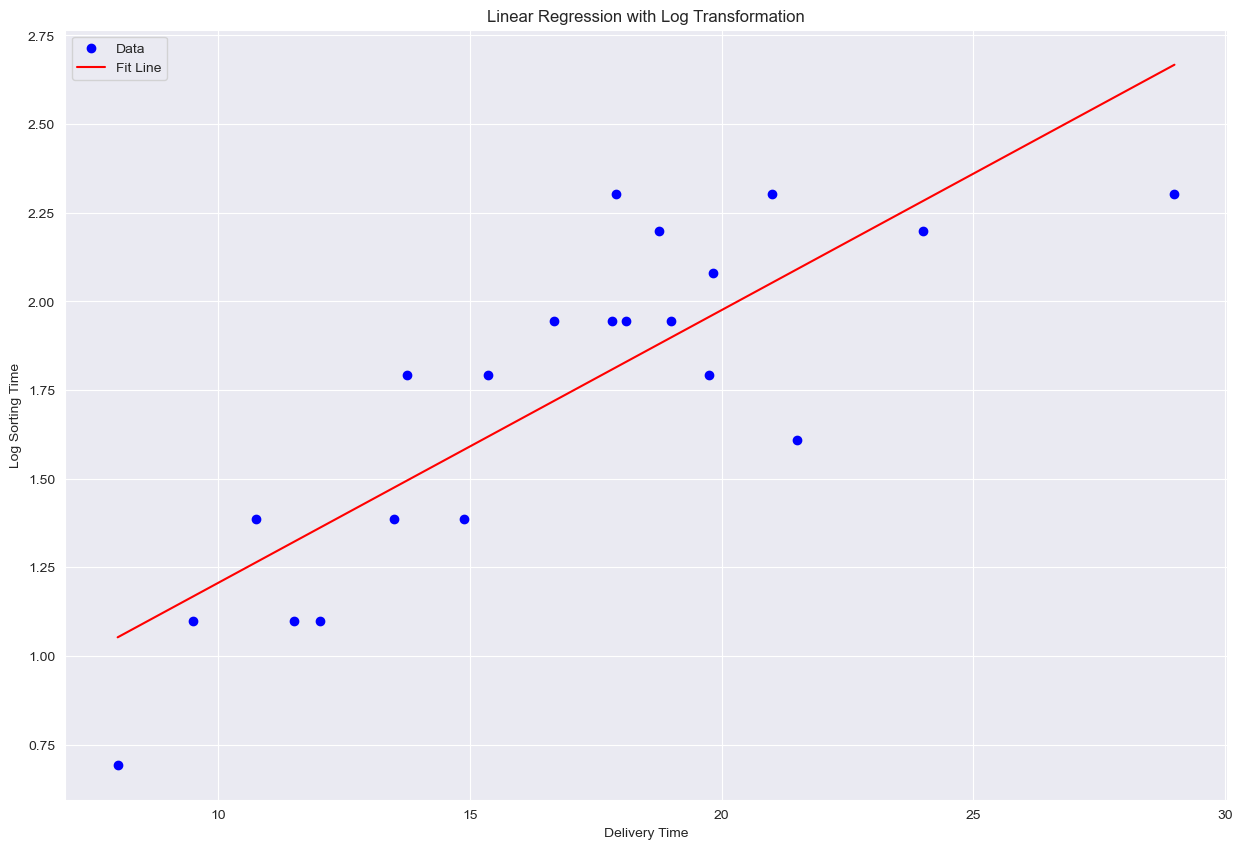

In [43]:
intercept = model_2.params['Intercept']
slope = model_2.params['delivery_time']

# Generate the fit line points
x = np.linspace(data['delivery_time'].min(), data['delivery_time'].max(), 100)
y = slope * x + intercept

# Plot best fit line for model 2
plt.scatter(data['delivery_time'], data['log_sorting'], color='blue', label='Data')
plt.plot(x, y, color='red', label='Fit Line')
plt.xlabel('Delivery Time')
plt.ylabel('Log Sorting Time')
plt.title('Linear Regression with Log Transformation')
plt.legend()
plt.show()

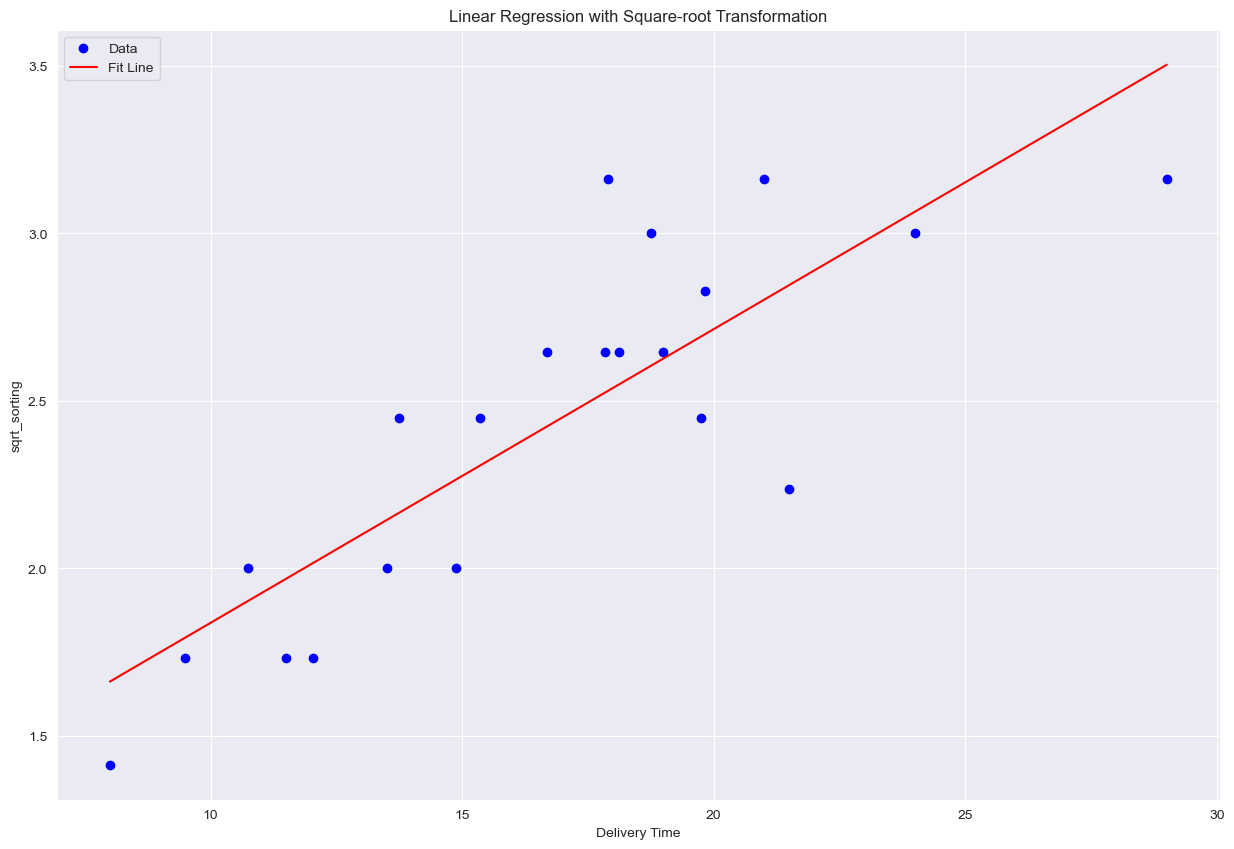

In [45]:
# Get the regression line parameters
intercept = model_3.params['Intercept']
slope = model_3.params['delivery_time']

# Generate the fit line points
x = np.linspace(data['delivery_time'].min(), data['delivery_time'].max(), 100)
y = slope * x + intercept

# Plot best fit line for model 3
plt.scatter(data['delivery_time'], data['sqrt_sorting'], color='blue', label='Data')
plt.plot(x, y, color='red', label='Fit Line')
plt.xlabel('Delivery Time')
plt.ylabel('sqrt_sorting')
plt.title('Linear Regression with Square-root Transformation')
plt.legend()
plt.show()

In [47]:
models = {
    'Model' : ['model_1','model_2','model_3'],
    'Score' : [m.rsquared for m in [model_1,model_2,model_3]]
}
scr = pd.DataFrame(models)
scr

,Model,Score
0,model_1,0.682271
1,model_2,0.695443
2,model_3,0.695806


In [48]:
scr[scr['Score']==scr['Score'].max()]

,Model,Score
2,model_3,0.695806


Sqrt transformed data performed best